In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel('IBM Attrition Data.xlsx')

In [3]:
data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [4]:
data.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [5]:
data.index

RangeIndex(start=0, stop=1470, step=1)

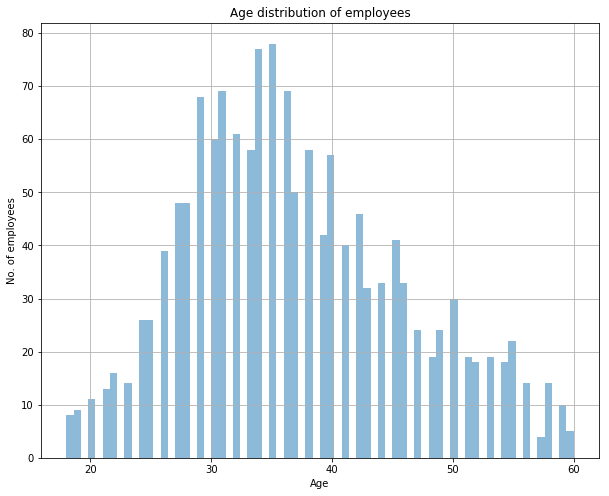

In [7]:
# histogram for age
plt.figure(figsize=(10,8))
data['Age'].hist(bins=70, alpha=0.5)
plt.title('Age distribution of employees')
plt.xlabel('Age')
plt.ylabel('No. of employees')
plt.show()

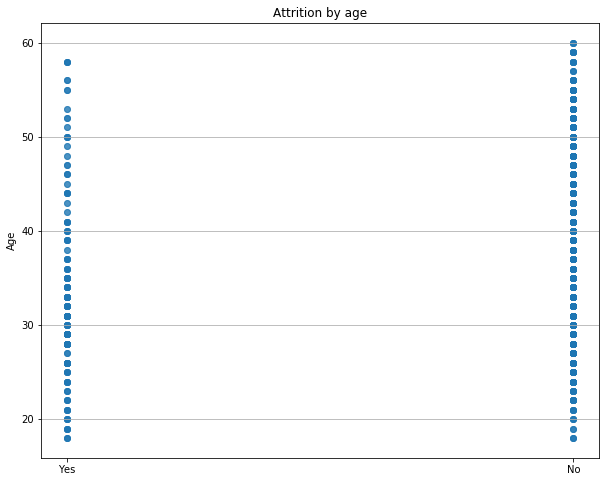

In [8]:
# Attrition by age
plt.figure(figsize=(10,8))
plt.scatter(data.Attrition, data.Age, alpha=0.55)
plt.title('Attrition by age')
plt.ylabel('Age')
plt.grid(b=True, which='major', axis='y')
plt.show()

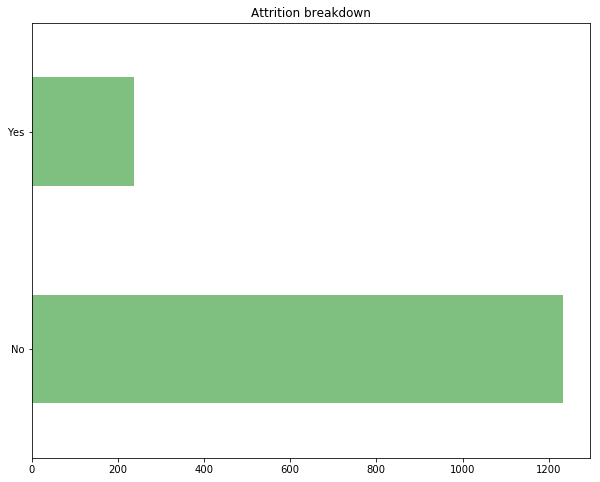

In [9]:
# Exploring data for left employees
plt.figure(figsize=(10,8))
data.Attrition.value_counts().plot(kind='barh', color='green', alpha=0.5)
plt.title('Attrition breakdown')
plt.show()

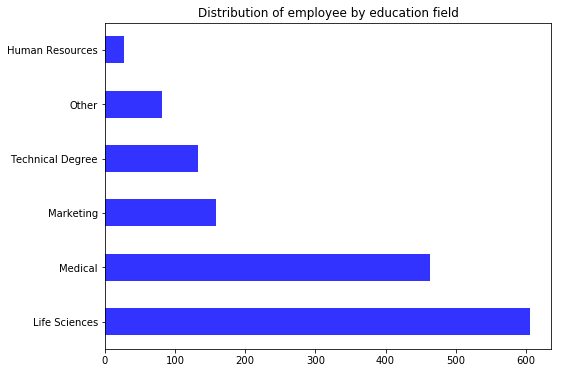

In [10]:
# Distribution of employees by the education field
plt.figure(figsize=(8,6))
data.EducationField.value_counts().plot(kind='barh', color='b', alpha=0.8)
plt.title('Distribution of employee by education field')
plt.show()

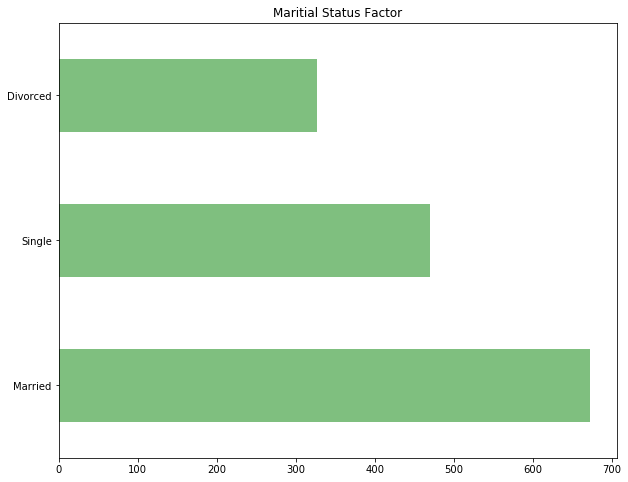

In [11]:
plt.figure(figsize=(10,8))
data.MaritalStatus.value_counts().plot(kind='barh', color='g', alpha=0.5)
plt.title("Maritial Status Factor")
plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
data.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [13]:
X_feature = pd.DataFrame(data[['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany']])
Y_target = pd.DataFrame(data[['Attrition']])

In [14]:
lr = LogisticRegression()
lr.fit(X_feature, Y_target)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
x1 = pd.DataFrame(X_feature)
y1 = pd.DataFrame(Y_target)
lr.fit(x1,y1)
predict = lr.predict(x1)
predict

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y1, predict))

              precision    recall  f1-score   support

          No       0.84      1.00      0.91      1233
         Yes       0.50      0.00      0.01       237

   micro avg       0.84      0.84      0.84      1470
   macro avg       0.67      0.50      0.46      1470
weighted avg       0.78      0.84      0.77      1470

